<a href="https://colab.research.google.com/github/ITMK/DataLitMT/blob/main/colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

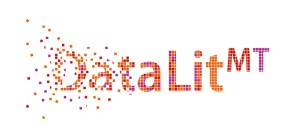

# Data Preparation: Terminology Extraction & Cleaning Training Data

## 1 Theory

### 1.1 Introduction

The use of consistent terminology is especially important in the field of translation but not limited to it. Tom Winter (2019:97) describes terminology as the heart of the corporate language of a company that can be used as a knowledge base, to enhance internal and external communication and increase the quality of technical documentation and translations. Some of the benefits for companies include the reduction of time and effort invested in text production and review, the improved quality control of products and processes, and the establishment of corporate branding and credibility ([cf. Bowker 2019:265](http://dx.doi.org/10.5040/9781350024960.0018)). It should come as no surprise that companies such as *Deutsche Bahn AG* or *Microsoft* are investing into collecting and preparing their own company-related terminology. 

If integrated successfully, terminology can also be used to customise a generic NMT engine, which will in turn produce higher-quality domain-specific output. As Tom Winter ([2019:98f.](https://doi.org/10.1007/978-3-662-58949-6)) points out, high-quality domain-specific NMT output can also unlock great potential in the training of AI engines for search engine optimization (SEO), chatbots or speech recognition. Search engines, for instance, deliver more relevant results if the underlying AI can recognise lexical ambiguity. However, in order for us to leverage language data in modern technologies, it needs to be relevant to the specific domain, consistent, machine-readable and made available to the respective users and systems ([cf. Heinisch 2019:120f.](https://doi.org/10.1007/978-3-662-58949-6)). So before training a generic NMT engine, preliminary terminological work and data preparation may be necessary if the training data does not meet the desired quality criteria.

### 1.2 Terminology in Neural Machine Translation

For translations, terminology is especially important because it contributes greatly to the meaning of a text ([cf. Winter/Zielinsky 2020:212]( https://d-nb.info/1212731727)). However, generic NMT systems fail to adequately translate terminology because they were trained with generic data and cannot apply specialised knowledge to their output (cf. Winter/Zielinski 2020:211). The post-editing effort for translations generated by generic NMT engines is therefore very high in terms of terminology. In order to obtain a more accurate translation and to reduce the effort for post-editing, NMT engines can be customised by training them with domain-specific data (ibid.). 
There are different ways of customising an NMT engine: training, domain adaptation, prioritizing, or the incorporation of terminology at the decoding stage (cf. Winter/Zielinski 2020:221f.). In order to train a new translation engine, extensive training material of 1 million bilingual translation units would be required, making this approach very costly and time-consuming. For domain adaptation, an existing engine is retrained with a smaller set of training data from 5,000-15,000 segments (cf. Winter/Zielinski 2020:222). Certain segments can be weighted, meaning they will be prioritised during training or domain adaptation. Lastly, terminology can be incorporated at the decoding stage, which is when the translation output is generated, by using a glossary or dictionary with the desired terminology. However, this still requires some post-editing effort since the terminology is often inserted by a simple search and replace function and thus not inflected (cf. Winter/Zielinski 2020:222).
In order for any of these approaches to be successful, the training data has to be consistent. For domain adaptation, for example, it is important that the target segments use consistent terminology. Otherwise, the quality of the MT output will suffer (cf. Winter/ Zielinski 2020:225).


### 1.3 Data Preparation and Terminology Extraction

The project steps for domain adaption include project planning and preparation, the evaluation of suitable MT systems, data preparation and integration, and finally training, training evaluation and retraining (cf. Winter/Zielinski 2020:227). Data preparation is especially important to ensure that consistent terminology is used in the training data. This might require some terminology work prior to the training phase. At the beginning of terminology work is terminology collection and extraction, where all terms used in monolingual or bilingual texts are identified, organised and prepared for further use.

One means to identifying and collecting terminology from monolingual or bilingual language corpora is automatic term extraction using a designated tool. While the preliminary identification of terms is automated, language professionals are still required to sort through this data, validate it and organise it (cf. Bowker 2019:268). 
Depending on the starting point and goal of terminology work, there are different extraction methods ([cf. Ferrari et al. 2020:M4-6](http://dttev.org/aktuelles-terminologie-erleben/2020/228-dtt-handbuch-best-practices-2-0-jetzt-auch-in-englisch.html)).
Concordance programs generate a list of all terms used in a text and show their frequency of occurrence (cf. Ferrari et al. 2020:M4-7). They are language independent and very practical for monolingual term extraction. Stop word lists can be incorporated to ignore certain words and reduce the noise (ibid.). The list has to be cleaned manually, which can be time-consuming depending on the size of the text corpus.
Statistical extraction is based on the assumption that the more frequently a term occurs in a text, the more relevant it is (cf. Ferrari et al. 2020:M4-9). A statistical extraction tool generates a list of the most frequent term candidates and shows their frequency of occurrence. It is language independent can be used for monolingual or multilingual source texts. A stop word list can be imported to help reduce the noise (ibid.).
The linguistic extraction compiles the most frequent term candidates and shows their frequency of occurrence. Other than the other methods, it is language-specific and can generate language patterns such as part of speech, word length, single or multiword terms or proper names (cf. Ferrari et al. 2020:M4-12). It can identify variants and consolidate them in their canonical forms, which significantly reduces the manual effort that is required for the other methods (cf. Ferrari et al. 2020:M9-14).

In practice, it is not unusual to use a combination of two or more extraction methods to improve the quality of the results.


### 1.4 Scenario


In this notebook, we will guide you through a fictional workflow as you might encounter it in your professional career. 

Imagine you want to implement domain adaptation to a generic NMT to improve the quality of your translations. You have compiled a TM with domain-specific bilingual language data but before starting the training, you need to make sure that it is consistent. Since you do not have a reliable term base yet, you want to extract the relevant terminology first to sort through it. After you have compiled a list of term candidates and chosen the preferred terms, you perform a quality check of the TM at hand, sorting through any terminological inconsistencies that might impair the quality of your training data.

## 2 Practice

### 2.1 Requirements

Before you start, please watch this video where we’ll brush on some basic concepts of terminology work and guide you step-by-step through the workflow presented in this notebook:

*Link to video*

Please also install the software linked below if you want to follow along. They’re all free open-source tools:

[QA Distiller](http://www.qa-distiller.com/en/download)

[Glossary Converter](https://appstore.rws.com/plugin/194/)


### 2.2 Housekeeping

Before you begin, you need to make sure that you meet the requirements to use this notebook.

First, run the code below to clone the DataLitMT GitHub Repository and to access the Translation Memory (TM).

In [ ]:
%%capture
!git clone https://github.com/ITMK/DataLitMT

Next, change the directory to the *TM2TB* folder and check its content. You can see that it contains the TMX file you want to work with in this notebook.

In [ ]:
%cd /content/DataLitMT/learning_resources/TM2TB
!ls

/content/DataLitMT/learning_resources/TM2TB
intro  TM_en-us_de-de.tmx


You also need to access another GitHub respository: [TM2TB](https://github.com/luismond/tm2tb).

TM2TB is an extraction module that focuses on bilingual data. It uses [spaCy](https://spacy.io/), a python-based open-source software library for natural language procession (NLP), to extract terms from sentences, pairs of sentences and bilingual documents.

First, run the code below to clone the TM2TB GitHub Repository into the *TM2TB* folder that we navigated to earlier.

In [ ]:
%%capture
!git clone https://github.com/luismond/tm2tb

Next, navigate to the *tm2tb* folder. It contains all the files we require from the TM2TB GitHub Repository.

In [ ]:
%%capture
%cd tm2tb

Run the next code to install the requirements.

In [ ]:
%%capture
!pip install -r requirements_colab.txt

There is an update available for one of the modules we just installed. Run the next code to install the update.

In [ ]:
%%capture
!pip install -U sentence-transformers

That's it. You're ready to go!

### 2.3 Term Extraction

In order to gain access to the functionality of the TM2TB module, you need to import it first.
Go ahead and run the code below.

In [ ]:
%%capture
import tm2tb

Next, you need to import the Term Extractor, Biterm Extractor and Bitext Reader from the *tm2tb* folder. You also need [Pandas](https://pypi.org/project/pandas/), which is a Python library used for working with data sets. It'll automatically format the extraction results in a tabluar structure, a so-called Pandas DataFrame.

In [ ]:
from tm2tb import TermExtractor
from tm2tb import BitermExtractor
from tm2tb import BitextReader
import pandas as pd
pd.options.display.width = 200 # to display results table in a compact way

Now that you've set everything up, let's start extracting! Run the following code to extract the terms from the TMX file in the *TM2TB* folder.

In [ ]:
path = '/content/DataLitMT/learning_resources/TM2TB/TM_en-us_de-de - Kopie.tmx'
bitext = BitextReader(path).read_bitext() # Read bitext
extractor = BitermExtractor(bitext)       # Instantiate extractor with bitext
bitext = extractor.extract_terms(incl_pos=('NOUN','ADJ'),span_range=(1,3)) #Extract terms
print(bitext)
  






The results are displayed in a Pandas DataFrame, which indicates the source and target terms and their corresponding part-of-speech (POS) tags, rank, similarity, frequency and biterm rank.

Finally, run the next code to save your extraction results as an Excel file in the *tm2tb* folder.

In [ ]:
bitext.to_excel('biterms.xlsx', sheet_name='sheet1', index=False) #Writes terms into Excel file in the tm2tb folder

That's it! You can now download your biterms by double-clicking the XLSX file.

# 3 FAQ

## What if the results are not what you expected?


You can always tweak the code a little to narrow down your results. Here are some ideas:

*Limit the number of results:*


```
print(bitext[:10]) #Prints the first 10 results

```


  

*Limit the result to certain POS tags*

`bitext = extractor.extract_terms(incl_pos=('NOUN', 'ADJ') #Extract nouns and adjectives only`

`bitext = extractor.extract_terms(excl_pos=('NOUN', 'ADJ') #Extracts everything excluding nouns and adjectives`


You can find a list of spaCy's POS tags [here](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/?utm_content=cmp-true).


*Define a minimum frequency for your terms*

`bitext = extractor.extract_terms(freq_min=3) #Only display terms that are found at least three times` 